# Project

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
import plotly.io as pio
%matplotlib inline

In [2]:
from utils import *
from handle_dataset import *
from density import * 
from zscore import *
from plots import * 
from kmeans import *

In [3]:
DATA_PATH = 'data'

In [4]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

In [5]:
labels = [
    'STAND',
    'SIT',
    'SIT&TALK',
    'WALK',
    'WALK&TALK',
    'CLIMB_STAIRS',
    'CLIMB_STAIRS&TALK',
    'STAND_TO_SIT',
    'SIT_TO_STAND',
    'STAND_TO_SIT&TALK',
    'SIT&TALK_TO_STAND',
    'STAND_TO_WALK', 
    'WALK_TO_STAND', 
    'STAND_TO_CLIMB_STAIRS',
    'CLIMB_STAIRS_TO_WALK',
    'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

]

## Exercise 2 - Import dataset

In [6]:
# data_user_0 = get_user_data(path=DATA_PATH, user_id=0)

In [7]:
# data_user_0.shape

In [8]:
dataset = get_all_data(DATA_PATH)

In [9]:
# dataset.shape

In [10]:
# type(dataset)

## Explore data

In [11]:
dataset.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06
mean,3.429246e+00,7.717793e-01,8.451621e+00,1.520613e+00,-1.691060e-01,1.890623e+00,3.556803e-01,-1.450031e-02,6.034252e-01,4.014632e-01,5.555476e+05,4.032846e+00
std,1.188858e+00,2.494840e+00,3.743438e+00,3.747458e+00,3.592437e+01,5.289265e+01,4.621969e+01,4.767157e-01,4.752627e-01,6.953205e-01,3.720966e+05,2.582780e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.077900e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,2.612300e+01,1.000000e+00
25%,2.000000e+00,-5.244600e-01,8.352300e+00,-1.328500e+00,-2.967200e+00,-2.829200e+00,-1.415125e+00,-4.087100e-01,5.211000e-01,-1.977500e-01,2.720200e+05,2.000000e+00
50%,3.000000e+00,3.722300e-01,9.388200e+00,1.323900e+00,1.709100e-01,-1.321600e-01,-1.696150e-02,3.941900e-02,7.182500e-01,4.391300e-01,5.370900e+05,4.000000e+00
75%,4.000000e+00,2.006400e+00,9.801800e+00,3.299600e+00,5.930100e+00,8.948325e+00,5.541700e+00,3.250500e-01,8.825900e-01,9.627200e-01,8.008600e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.606100e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [12]:
# dataset.info()

In [13]:
# dataset.columns

## Append metrics

In [14]:
data_with_features = append_metrics(dataset)

In [15]:
data_with_features

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity,accelerometer_module,gyroscope_module,magnetometer_module
0,1,-1.8650,9.3890,2.58120,-1.141800,-1.18560,0.84998,-0.34476,0.59839,1.01340,505.89,1,9.914340,1.852517,1.226340
1,1,-1.7963,9.3742,2.44600,-1.561800,-0.66165,0.59730,-0.34274,0.57631,1.00000,525.42,1,9.853184,1.798268,1.203995
2,1,-1.8696,9.3000,2.35140,-1.187700,-1.28410,0.14212,-0.34476,0.59639,1.01560,544.95,1,9.773151,1.754919,1.227185
3,1,-1.7961,9.3624,2.45840,-0.583990,-2.03340,0.42912,-0.32863,0.62249,1.01560,564.48,1,9.845011,2.158681,1.235692
4,1,-1.6768,9.3506,2.46850,-0.370500,-1.36470,0.37194,-0.33669,0.62048,1.02450,584.01,1,9.815237,1.462196,1.244169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242723,5,-1.0568,9.7161,0.37560,-0.158430,-0.88740,0.44327,0.12121,0.62675,0.36739,1061000.00,1,9.780619,1.004523,0.736534
3242724,5,-1.0565,9.6921,0.38826,0.112400,-0.59353,0.39687,0.11111,0.59880,0.36304,1061000.00,1,9.757240,0.722784,0.709017
3242725,5,-1.0566,9.6920,0.37607,-0.054114,-0.67227,0.36407,0.11717,0.58084,0.35217,1061100.00,1,9.756674,0.766435,0.689295
3242726,5,-1.0563,9.6801,0.38850,0.096447,-0.51923,0.16742,0.11717,0.61677,0.36304,1061100.00,1,9.745309,0.554014,0.725212


## Select only right wrist data

Nos seguintes exercícios, apensa serão usados o dataset do pulso direito

In [16]:
def get_device_data(data, device_id):
    return data[data['device_id'] == device_id]

In [17]:
right_wrist_id = 2
data = get_device_data(data_with_features, right_wrist_id)
right_wrist_data = data[['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]
right_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

## Exercise 3.1 - Boxplot of the vector modules grouped by activity

In [18]:
# boxplot_features(data_with_features, 0)
# boxplot_features(data_with_features, 1)
# boxplot_features(data_with_features, 2)

Pelos boxplot dos módulos dos diferentes vetores podemore concluir que :
    - as variáveis estão em ordens de grandeza muito diferentes
    - existe muito quantidade de outliers, no entanto isto pode dever-se também a estarem a ser utilizados neste gráfico, todos os dispositivos de sensores, que impactam os resultados


### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

### Plot of the right wrist (id = 2)

In [19]:
# boxplot_features(right_wrist_data, 0, title='Right wrist')
# boxplot_features(right_wrist_data, 1, title='Right wrist')
# boxplot_features(right_wrist_data, 2, title='Right wrist')

Ao utilizar os dados de apenas um dispositivo, é notório que a quantidade de outliers diminui consideravelmente. Verificando-se, no caso da variavel 'accelerometer_module' 

In [20]:
# right_wrist_data.describe()

## Exercise 3.2 - Outliers density

In [21]:
# densities = calculate_density_by_activity(data, labels)
# densities

In [22]:
# plot_densities(densities)

Como se pode observar pelas densidades de outliers obtidas, o vetor de aceleração é o que apresenta maior quantidade de outliers. Isto poderá dever-se ao facto de ser o mais sensível a movimentos da pessoa. Pelo contrátrio, o vetor de variação do campo magnético, em algumas situações nem apresenta outliers. Outra conclusão que podemos retirar do gráfico, é que as atividades *Sit to stand* e *Sit and talk to stand* são as que apresentam maior quantidade de outliers nos três vetores, mostrando que o movimento de levantar gera muitas oscilações e perturbações nos sensores.

## Exercise 3.3 - Z-score test

In [23]:
# plot_zscore_outliers(data,'accelerometer_module')
# plot_zscore_outliers(data,'gyroscope_module')
# # plot_zscore_outliers(data,'magnetometer_module')

Pelos gráficos, podemos observar que à medida que o k aumenta, o número de pontos considerados outliers diminui. Mostra-se assim, que ao aumentar k, aumentamos a gama de valor válidos, sendo menos restrito a certos outliers

## Exercise 3.6 - K-means

Como se pode observar, segundo o método Elbow, k=9 parece ser o número de clusters ideal

#### Plot by devices

In [24]:
# kmeans = KMeans(optimal_k)

In [25]:
# labels = kmeans.predict(right_features)

In [26]:
# plot_kmeans_clusters(kmeans.data, labels)

In [27]:
# labels.to_csv('labels.csv', index=False)

In [28]:
# plot_kmeans_clusters(kmeans.data, right_wrist_data['activity'] )

In [29]:
accelerometer_data = data[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']]
gyroscope_data = data[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
magnetometer_data = data[['magnetometer_x', 'magnetometer_y', 'magnetometer_z']]

### Accelerometer

In [30]:
# optimal_k_acc = best_number_clusters(normalize_data(accelerometer_data), threshold=0.90)
# print('optimal k:', optimal_k_acc)

In [31]:
# print('optimal k:', optimal_k_acc)

In [32]:
# %%time
# kmeans_acc = KMeans(optimal_k_acc, max_iterations=150)
# labels_acc = kmeans_acc.predict(accelerometer_data)

In [33]:
# labels_acc.to_csv('labels_acc.csv', index=False)

In [34]:
# kmeans_acc.get_distances().max()

In [35]:
# labels_acc = kmeans_acc.get_labels_with_outliers(2.5)

In [36]:
# plot_kmeans_clusters(kmeans_acc.data, labels_acc, optimal_k_acc, 'accelerometer')

### Gyroscope

In [37]:
# optimal_k_gyro = best_number_clusters(gyroscope_data, threshold=0.90)
# print('optimal k:', optimal_k_gyro)


In [38]:
# %%time
# kmeans_gyro = KMeans(2)
# labels_gyro = kmeans_gyro.predict(gyroscope_data)

In [39]:
# labels_gyro = kmeans_gyro.get_labels_with_outliers(2.5)

In [40]:
# labels_gyro.to_csv('labels_gyro.csv', index=False)

In [41]:
# plot_kmeans_clusters(kmeans_gyro.data, labels_gyro, optimal_k_gyro, 'gyroscope')

### Magnetometer

In [42]:
# optimal_k_mag = best_number_clusters(normalize_data(magnetometer_data), threshold=0.85)
# print('optimal k:', optimal_k_mag)

In [43]:
# %%time
# kmeans_mag = KMeans(2)
# labels_mag = kmeans_mag.predict(magnetometer_data)

In [44]:
# labels_mag = kmeans_mag.get_labels_with_outliers(2.5)

In [45]:
# labels_mag.to_csv('labels_mag.csv', index=False)

In [46]:
# %%time
# plot_kmeans_clusters(kmeans_mag.data, labels_mag, optimal_k_mag, 'magnetometer')

### DBSCAN

Foi elaborado um estudo semelhante ao anterior, mas agora utilizando o DBSCAN como algoritmo de *unsupervised learning*

In [47]:
# from sklearn.cluster import DBSCAN

In [48]:
# acc_scan = DBSCAN(eps=1).fit(accelerometer_data)

In [49]:
# acc_labels = acc_scan.labels_

In [50]:
# def plot_3d(data, labels, title):
#     fig = plt.figure(figsize = (15,15))
#     ax = fig.add_subplot(111, projection='3d')
#     for label in labels.unique():
#         ax.scatter(data[labels == label][data.columns[0]],
#             data[labels == label][data.columns[1]],
#             data[labels== label][data.columns[2]],
#             label=f'cluster {label}'
#             )
            
#     ax.set_xlabel(data.columns[0])
#     ax.set_ylabel(data.columns[1])
#     ax.set_zlabel(data.columns[2])
#     plt.title(title)
#     ax.legend()
#     plt.show()

## Exercise 3.8 - Add outliers

In [51]:
def calculate_density(outliers):
    return outliers.sum() / len(outliers)

In [79]:
def inject_outliers(quantity, data, outliers_indexes, k, mean, std, z=1):
    data = data.copy()
    non_outliers = data[outliers_indexes == False]
    indexes = non_outliers.sample(quantity, random_state=42).index
    data[indexes] = data[indexes].apply(lambda x :  (mean + k * random.choice([1, -1]) * (std + np.random.uniform(0, z))))
    return data

In [90]:
def add_outliers(percentage, k, data):
    indexes = calculate_outliers_indexes(data, k)
    density = calculate_density(indexes)
    print('Density of outliers:', density * 100)
    mean = data.mean()
    std = data.std()
    if density < percentage:
        quantity = int((percentage - density) * len(data))
        data_with_outliers = inject_outliers(quantity, data, indexes, k, mean, std)
        return data_with_outliers, density

In [70]:
k = 3
percentage = 0.1

Density:  0.8411345181844668
Density:  1.8329326923076923
Density:  0.23699504573170732
Density:  2.5390625
Density:  2.2235576923076925
Density:  0.3635153785488959
Density:  2.994791666666667
Density:  1.837270341207349
Density:  1.069790043877828
Density:  1.2335958005249343
Density:  1.0690754815054155
Density:  1.3123359580052494
Density:  1.3014917355834332
Density:  1.2598425196850394
Density:  1.3587266789979675
Density:  1.2598425196850394


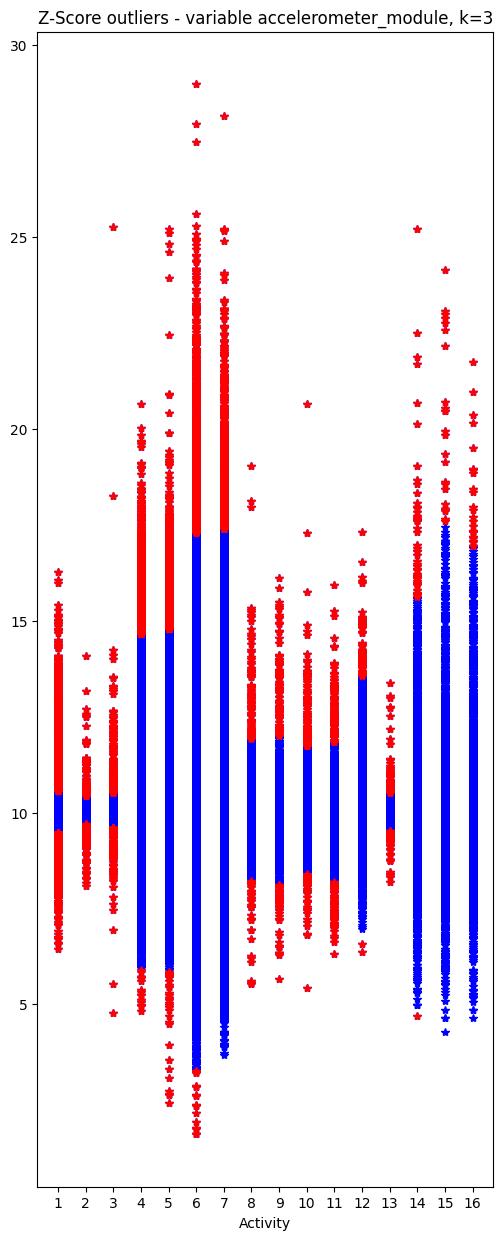

In [71]:
plot_zscore_outliers(data, 'accelerometer_module', k_value=k )

In [91]:
series_with_outliers, original_density = add_outliers(percentage, k, data['accelerometer_module'])

Density of outliers: 2.149338340440663


In [82]:
outliers_data = data.copy()
outliers_data['accelerometer_data'] = series_with_outliers

In [247]:
outliers_data.to_csv('data_with_outliers.csv', index=False)

In [83]:
data['accelerometer_module'].equals(series_with_outliers)

False

In [84]:
diff_indexes = data['accelerometer_module'] != series_with_outliers

In [89]:
percentage_added_outliers = (diff_indexes.sum() / len(data)) * 100
print('Percentage of added outliers:', percentage_added_outliers)

Percentage of added outliers: 7.85063607828892


In [93]:
round(original_density*100 + percentage_added_outliers)

10

Density:  0.8411345181844668
Density:  1.8329326923076923
Density:  0.23699504573170732
Density:  2.5390625
Density:  2.2235576923076925
Density:  0.3635153785488959
Density:  2.994791666666667
Density:  1.837270341207349
Density:  1.069790043877828
Density:  1.2335958005249343
Density:  1.0690754815054155
Density:  1.3123359580052494
Density:  1.3014917355834332
Density:  1.2598425196850394
Density:  1.3587266789979675
Density:  1.2598425196850394


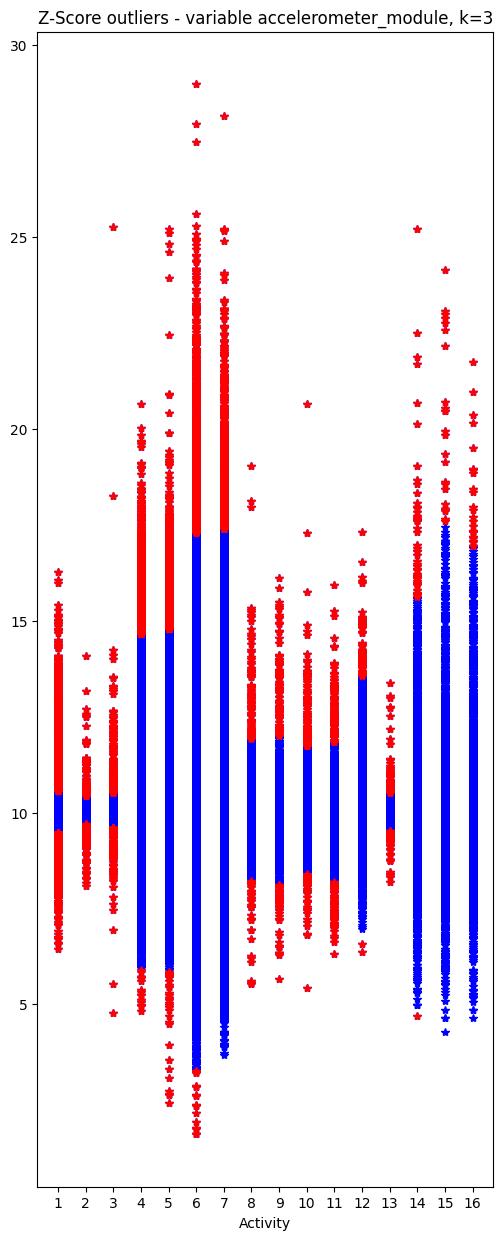

In [77]:
plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

## Exercise 3.9 - Linear regression

In [159]:
p_value = 100

In [241]:
def calculate_alphas(data, p):
    y = data[p:]
    rows = len(data) - p
    cols = p + 1
    x = np.ones((rows, cols))
    for i in range(rows):
        x[i, 1:] = data[i:p+i][::-1]

    x_plus = np.linalg.pinv(x)
    a = x_plus.dot(y)
    return a

In [232]:
def predict(data, p, a=None):
    """ receives only the previous points and returns the predicted value based on the previous p points"""
    size = len(data)
    if a is None:
        print('calculate_betas')
        a = calculate_alphas(data, p)
    prev_values = np.ones(p+1)
    prev_values[1:] = data[:size-p-1:-1]
    y_pred = prev_values.dot(a)
    return y_pred

In [233]:
def plot_results(data, p):
    print('Real value:', data[-1])
    y_pred = predict(data[:-1], p)
    print('Predicted value:', y_pred)
    x_axis = np.arange(len(data))
    plt.scatter(x_axis, data, label='real values')
    x_axis_pred = len(data)
    plt.scatter(x_axis_pred, y_pred, color='r', label='predicted values')
    plt.legend()
    plt.show()

In [235]:
data_with_linear_regression = outliers_data.copy()

In [234]:
regressed_acc = data_with_linear_regression['accelerometer_data']

In [236]:
outliers_indexes = calculate_outliers_indexes(outliers_data['accelerometer_module'], k)

In [237]:
indexes = pd.Series(data_with_linear_regression[outliers_indexes].index)
len(indexes)

16804

In [238]:
first_outlier = indexes.min()
first_outlier

63425

In [243]:
a = calculate_alphas(regressed_acc.loc[:first_outlier-1], p_value)
a

C:\Users\joana\AppData\Local\Temp\ipykernel_2648\2758398453.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\joana\AppData\Local\Temp\ipykernel_2648\2758398453.py:7: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



array([ 1.02089388e+01,  1.44340013e-02,  1.91651555e-03,  7.08096687e-03,
       -1.14459802e-02, -2.73897280e-03,  1.43285809e-02, -6.32071762e-03,
       -4.85618700e-04,  5.62730123e-03, -1.46850672e-03, -6.91329355e-03,
       -1.90192086e-03, -1.97349372e-02, -2.93538622e-03, -4.49842361e-04,
        3.22956315e-03,  7.85741001e-03,  5.12840221e-03,  1.32689024e-02,
       -4.20763440e-03, -1.96047665e-03, -4.16864924e-03, -2.82940317e-03,
        2.00345188e-03, -3.24624310e-03, -9.55812350e-03,  5.58576030e-03,
        8.37920917e-03, -1.15115272e-03, -5.17509974e-03,  3.52093813e-03,
        2.73425969e-02, -1.36675653e-02,  2.07606672e-02, -1.74047987e-03,
        5.68281041e-03, -2.83161427e-03,  9.64464658e-03, -4.04935835e-03,
       -4.09837791e-03, -7.57030997e-04, -4.89888878e-03,  2.65200703e-03,
       -1.30861881e-03, -1.02606198e-02,  9.11334407e-03,  1.85098269e-02,
       -3.14833258e-03,  5.09297884e-03,  1.83162915e-03, -4.81950418e-03,
       -4.06792364e-03, -

In [244]:
regressed_acc[indexes] = indexes.apply(lambda x: predict(regressed_acc[:x], p_value, a))

C:\Users\joana\AppData\Local\Temp\ipykernel_2648\37051513.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\joana\AppData\Local\Temp\ipykernel_2648\1307082554.py:8: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [248]:
regressed_acc.equals(data_with_linear_regression['accelerometer_data'])

False

In [249]:
data_with_linear_regression['accelerometer_data'] = regressed_acc

In [251]:
data_with_linear_regression.to_csv('data_linear_regression.csv', index=False)

Density:  0.8411345181844668
Density:  1.8329326923076923
Density:  0.23699504573170732
Density:  2.5390625
Density:  2.2235576923076925
Density:  0.3635153785488959
Density:  2.994791666666667
Density:  1.837270341207349
Density:  1.069790043877828
Density:  1.2335958005249343
Density:  1.0690754815054155
Density:  1.3123359580052494
Density:  1.3014917355834332
Density:  1.2598425196850394
Density:  1.3587266789979675
Density:  1.2598425196850394


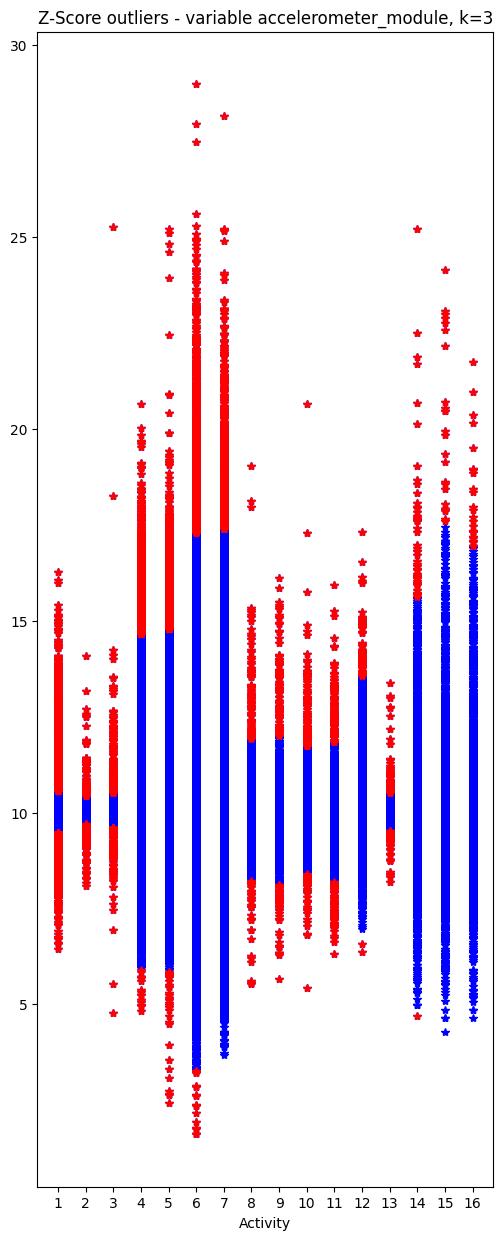

In [252]:
plot_zscore_outliers(data_with_linear_regression, 'accelerometer_module', k_value=k )

## Exercise 4.1 - Statistical significance - control the risk

In [15]:
from scipy.stats import kstest
from scipy.stats import norm

Nos resultados apresentados a seguir, foi utilizado um *threshold* the 5% no teste de Kolgomorov-Smirov para que o p-value de forma a aceitar a distribuição das variáveis como normal.

In [29]:
def ks_test(data, variable, threshold=0.05):
    # check if the activities have a normal (gaussian distribution)
    # https://www.statology.org/plot-normal-distribution-python/
    plt.figure()
    plt.title(f'{variable} distribution')
    for activity in data['activity'].unique():
        #divide data by activitis to check the normallity
        activity_data = data[data['activity'] == activity][variable]
        statistics, p_value = kstest(activity_data, norm.cdf)
        if p_value < threshold:
            print(f'Variable {variable} - activitiy {activities_labels[activity]}: Reject normal distributions | p-value={p_value}')
        else:
            print(f'Variable {variable} - activitiy {activities_labels[activity]}: Normal distribution | p-value={p_value}')
        activity_data.hist(alpha=0.4, label=activities_labels[activity])
        
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
                             

In [17]:
accelerometer_mod_data = right_wrist_data[['accelerometer_module', 'activity']]
gyroscope_mod_data = right_wrist_data[['gyroscope_module', 'activity']]
magnetometer_mod_data = right_wrist_data[['magnetometer_module', 'activity']]

Variable accelerometer_module - activitiy STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy STAND_TO_SIT: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT_TO_STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy STAND_TO_SIT&TALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT&TALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT&TALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy STAND_TO_WALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy WALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy WALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - acti

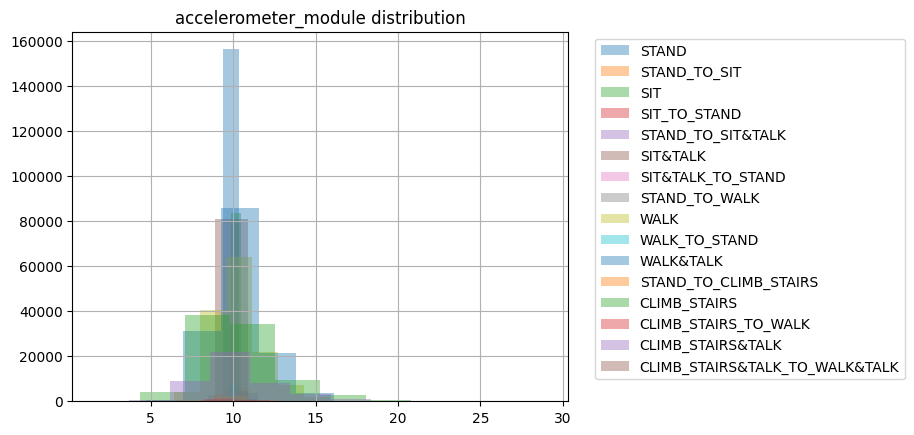

In [18]:
ks_test(accelerometer_mod_data, 'accelerometer_module')

Como se pode observar, apesar de histogramas do módulo do vetor de aceleração parecerem seguir uma distribuição normal, todos têm p-value inferior ao minimo necessário para aceitar a hipótese nula, logo não segue uma distribuição normal.

Variable gyroscope_module - activitiy STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy STAND_TO_SIT: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT_TO_STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy STAND_TO_SIT&TALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT&TALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT&TALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy STAND_TO_WALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy WALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy WALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy WALK&TALK: Reject normal distributions

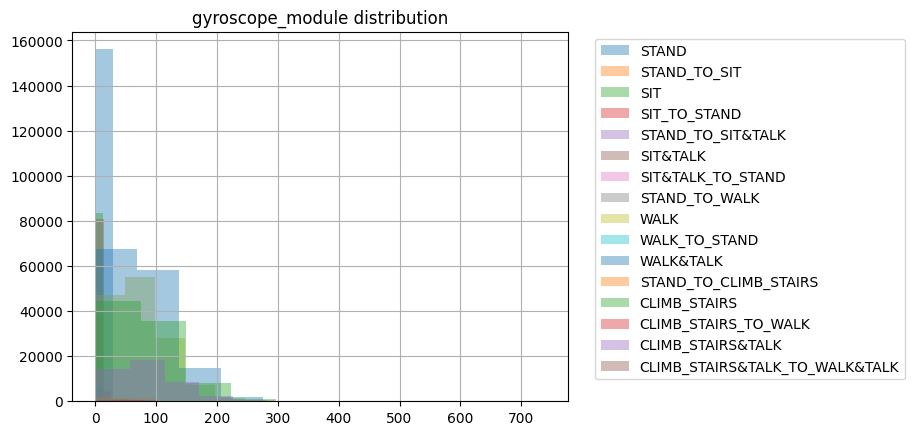

In [19]:
ks_test(gyroscope_mod_data, 'gyroscope_module')

Como se pode observar pela distribuição e pelo p-value, o módulo do vetor giroscópio não segue uma distribuição gaussiana.

Variable magnetometer_module - activitiy STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy STAND_TO_SIT: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT_TO_STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy STAND_TO_SIT&TALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT&TALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT&TALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy STAND_TO_WALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy WALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy WALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy WALK&

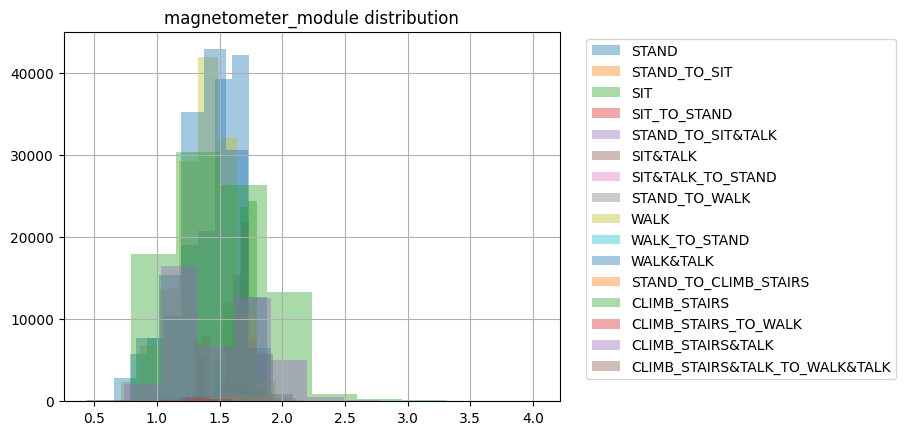

In [20]:
ks_test(magnetometer_mod_data, 'magnetometer_module')

Pela observação so gráfico e pelo valor obtido no p-value concluí-mos que o módulo do vetor do magnómetro não segue uma distribuição normal.

Em todas as variáveis, notou-se o que valor resultante do p-value usando o teste de Kolmogorov-Smirnov é nulo, ou perto disso. Assim, conclí-mos que nenhum dos vetores segue uma distribuição normal.

Em suma:

- os módulos dos vetores não seguem uma distribuição normal/gaussiana pelo que temos de escolher um teste não-paramétrico (apesar de termos um dimensão bastante elevada de valores de input)
- temos 3 variáveis (x, y, e, z de cada vetor) numéricas como valor de input que estão emparelhadas entre si
 
Assim, segundo o *Choosing Statistical Tests* (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/), escolhemos o teste de Friedman para calcular a significância estatística das variáveis.

In [23]:
from scipy.stats import friedmanchisquare

In [27]:
def friedman_test(data, variables, threshold=0.05):
    # https://www.statology.org/friedman-test-python/
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html

    # null-hypothesis: all variables have the same probability (mean)
    # at least one variable has a different probability

    x = data[variables[0]]
    y = data[variables[1]]
    z = data[variables[2]]

    for activity in data['activity'].unique():
        act_x = x[data['activity'] == activity]
        act_y = y[data['activity'] == activity]
        act_z = z[data['activity'] == activity]

        statistic, pvalue = friedmanchisquare(act_x, act_y, act_z)

        if pvalue < threshold:
            print(f"Activity {activities_labels[activity]} - Samples don't have the same distribution | p-value={pvalue}")
        else:
            print(f"Activity {activities_labels[activity]} - Samples have the same distribution | p-value={pvalue}")


In [31]:
var = 'accelerometer'
friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Activity STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity WALK&TALK - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_CLIMB_STAIRS - Samples don't have the same distribution | p-value=0.0
Activity CLIMB_STAIRS - Samples don't have the same distributi

In [29]:
var = 'gyroscope'
friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Activity STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT - Samples don't have the same distribution | p-value=1.533122713563826e-104
Activity SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT_TO_STAND - Samples don't have the same distribution | p-value=1.485360778908544e-21
Activity STAND_TO_SIT&TALK - Samples don't have the same distribution | p-value=2.4822179278238128e-50
Activity SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK_TO_STAND - Samples don't have the same distribution | p-value=1.4361869146926108e-13
Activity STAND_TO_WALK - Samples don't have the same distribution | p-value=3.43845656034788e-17
Activity WALK - Samples don't have the same distribution | p-value=9.036910839276396e-214
Activity WALK_TO_STAND - Samples don't have the same distribution | p-value=2.3614413888901384e-83
Activity WALK&TALK - Samples don't have the same distribution | p-value=2.561168163872224e-10
Ac

In [30]:
var = 'magnetometer'
friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Activity STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity WALK&TALK - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_CLIMB_STAIRS - Samples don't have the same distribution | p-value=0.0
Activity CLIMB_STAIRS - Samples don't have the same distributi

Como se pode observar, p-value, resultante do teste de Friedman para todas os vetores e actividades, é sempre nulo, pelo que rejeitamos a hipótese de que os dados seguem a mesma distribuição 

## Exercise 4.2 - feature extraction

In [81]:
sensors_columns = [
    'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
]

In [82]:
# select rows
sensors_data = data[sensors_columns]

### Frequencia a utilizar
Segundo o README do dataset, as amostas foram recolhidas a uma frequencia de amostraggem de 51.2 Hz

In [83]:
fs = 51.2
t = 1 / fs

### Tamanho da janela e sobreposição

De forma a evitar o aliasing, iremos calcular as features por janela, sendo que iremos usar um tamanho de janela de 3 periodos e uma sobreposição de 60%

In [93]:
window_periods = 3
window_size = int(window_periods / t)
overlap = 0.6
step = int(window_size * overlap)

In [14]:
from scipy import stats

In [237]:
def extract_statistical_features(data):
    df = pd.DataFrame()
    for column in data.columns:
        df[f'{column}_mean'] = [data[column].mean()]
        # mean
        # median
        df[f'{column}_median'] = [data[column].median()]
        # Std
        df[f'{column}_std'] = [data[column].std()]
        # variance
        df[f'{column}_variance'] = [data[column].var()]
        # Root mean square
        df[f'{column}_rms'] = [np.sqrt((data[column] ** 2).mean())]
        # average derivatives
        # Skewness
        df[f'{column}_skewness'] = [data[column].skew()]
        # kurtosis
        df[f'{column}_kurtosis'] = [data[column].kurtosis()]
        # Interquartile range
        df[f'{column}_interquantile'] = [stats.iqr(data[column])]
        # zero crossing rate
        df[f'{column}_non_crossing_rate'] = [len(np.nonzero(np.diff(data[column] > 0))[0])] # https://www.folkstalk.com/tech/zero-crossing-rate-python-with-code-examples/
        # mean crossing rate
        aux = data[column] - data[column].mean() # to centre in zero
        df[f'{column}_mean_crossing_rate'] = [len(np.nonzero(np.diff(aux > 0))[0])]
        # TODO: pairwise correlation
        # TODO: spectral entropy
    return df

In [25]:
from scipy.fft import fft

In [238]:
def mi(data):
    return np.sqrt((data**2).sum(axis=1))

def ai(mi_data):
    return mi_data.mean()

def vi(mi_data):
    return mi_data.var()

def sma(data):
    return np.sum(data.abs().sum()) / len(data)

def eva(data):
    cov_data = data.cov()
    eigenvalues, _ = np.linalg.eig(cov_data)
    return eigenvalues[0], eigenvalues[1]

def cagh(data):
    """Accelemeter data"""
    norm = np.sqrt((data ** 2).sum(axis=1))
    return np.corrcoef(data['accelerometer_x'], norm)

def avh(data, time):
    """Accelemeter data"""
    velo_y = data['accelerometer_y'].mean() * time
    velo_z = data['accelerometer_z'].mean() * time
    return np.sqrt(velo_y **2 + velo_z**2)

def avg(data):
    """Accelemeter data"""
    return np.trapz(data['accelerometer_x'])

def aratg(data):
    """Gyroscope data """
    return data['gyroscope_x'].cumsum() / len(data)

def dominant_frequency(data):
    return np.argmax(fft(data.to_numpy())**2)

def energy(data):
    return np.sum(fft(data.to_numpy())**2) / len(data)

In [239]:
def extract_physical_all(data):
    """ data has acc, gyro, mag, xyz values """
    df = pd.DataFrame()
    for column in data.columns:
        # dominant frequency
        df[f'{column}_df'] = [dominant_frequency(data[column])]
        df[f'{column}_energy'] = [energy(data)]
        
    return df

In [220]:
accelerometer_columns = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z']
gyroscope_columns = ['gyroscope_x', 'gyroscope_y', 'gyroscope_z']

In [234]:
def extract_phisical_features(data):
    """data containing the sensors acceleremeter, gyroscope, magnometer"""
    df = extract_physical_all(data)
    # MI - movement intensity - independent od the orientation not used
    mi_values = mi(data[accelerometer_columns])
    # eigenvalues of dominant directions
    eva_values = eva(data[accelerometer_columns])
    # AI - MI mean
    df['ai'] = [ai(mi_values)]
    # VI - MI variance
    df['vi'] = [vi(mi_values)]
    # SMA - normalized signal magnitude area
    df['sma'] = [sma(data)]
    # EVA - eigenvalues of dominant directions
    df['eva_1'] = [eva_values[0]]
    df['eva_2'] = [eva_values[1]]
    # CAGH - correlation between acceleration along gravity and heading directions
    df['cagh'] = [cagh(data[accelerometer_columns])]
    # AVH - averaged velocity along heading direction
    df['avh'] = [avh(data[accelerometer_columns], window_periods)]
    # AVG - averaged velocity along gravity direction
    df['avg'] = [avg(data[accelerometer_columns])]
    # ARATG - average rotation angles related to gravity direction
    df['aratg'] = [aratg(data[gyroscope_columns])]
    # AAE averaged acceleration energy
    df['aae'] = np.mean([df['accelerometer_x_energy'], df['accelerometer_y_energy'], df['accelerometer_z_energy']])
    # ARE - averaged rotation energy
    df['are'] = np.mean([df['gyroscope_x_energy'], df['gyroscope_y_energy'], df['gyroscope_z_energy']])
    
    return df
    

In [240]:
def extract_features(data):
    physical_dataframes = []
    statistical_dataframes = []
    count = 0
    for i in range(window_size, len(data), step):
        physical_dataframes.append(extract_phisical_features(data.iloc[i-window_size:i, :]))
        statistical_dataframes.append(extract_statistical_features(data.iloc[i-window_size:i, :]))
        count += 1
    print(count)
    physical = pd.concat(physical_dataframes)
    statistical = pd.concat(statistical_dataframes)
    
    return pd.concat([statistical, physical], axis=1)

In [228]:
len(range(window_size, len(data), step))

8590

In [242]:
%%time
df = extract_features(sensors_data)

8590
CPU times: total: 11min 19s
Wall time: 11min 37s
